# yfinance Scratchpad

In [1]:
import yfinance as yf

In [2]:
tsla = yf.Ticker("TSLA")

# get stock info
tsla.info

{'zip': '94304',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 48016,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, Netherlands, Norway, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers sedans and sport utility vehicles. It also provides electric powertrain components and systems; and services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians, as well as sells used vehicles. This segment markets and sells its products through a network of company-owned stores and galleries, as well as through its own Website. The Energy Generation and Storage segment offers energy storage products, such as rechargeable lithium-ion battery systems for use in homes, industrial, commercial facilities, and utility grids; and desig

In [3]:
# get historical market data
hist = tsla.history(period="max")

In [4]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,19.00,25.00,17.54,23.89,18766300,0,0
2010-06-30,25.79,30.42,23.30,23.83,17187100,0,0
2010-07-01,25.00,25.92,20.27,21.96,8218800,0,0
2010-07-02,23.00,23.10,18.71,19.20,5139800,0,0
2010-07-06,20.00,20.00,15.83,16.11,6866900,0,0


In [5]:
hist2=hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
hist2.head()

,Close
Date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11


In [6]:
hist3=hist2.sort_values('Date')
hist3=hist3.pct_change().dropna()
hist3=hist3.reset_index()
hist3.head()

,Date,Close
0,2010-06-30,-0.002512
1,2010-07-01,-0.078473
2,2010-07-02,-0.125683
3,2010-07-06,-0.160937
4,2010-07-07,-0.019243


In [7]:
hist3.rename(columns={'Close': 'dly_rtn'}, inplace=True)
hist3.head()

,Date,dly_rtn
0,2010-06-30,-0.002512
1,2010-07-01,-0.078473
2,2010-07-02,-0.125683
3,2010-07-06,-0.160937
4,2010-07-07,-0.019243


In [8]:
hist3.to_csv('tsla_returns.csv',  header=hist3.columns)

# All Sentiment data

In [10]:
# Read in data from Jatinder
from pathlib import Path
import pandas as pd
file_name = 'df_for_regression_grouped_by_date_hysteresis.csv'
# file_name = 'df_for_regression_grouped_by_date_and_source_transposed_without_NaN_hysteresis.csv'
# data = Path(f'Jatinder/files/data/{file_name}')
data = Path(f'{file_name}')
all_df = pd.read_csv(data)
all_df.head()

,date,dly_rtn,stocknews_sentiment,vader_sentiment,textblob_lemmatized_sentiments,textblob_stemmed_sentiments
0,3/6/19,-0.001085,0.0,0.9726,0.069364,0.041566
1,3/7/19,0.001267,0.5,0.9827,0.063081,0.069304
2,3/8/19,0.027297,1.0,0.9928,0.056798,0.097043
3,3/11/19,0.023861,-1.0,-0.9235,0.063292,0.087270
4,3/12/19,-0.025987,-1.0,-0.9229,0.022327,-0.032525


In [11]:
sent_all_df=all_df.drop(columns=['date'])
sent_all_df.head()

,dly_rtn,stocknews_sentiment,vader_sentiment,textblob_lemmatized_sentiments,textblob_stemmed_sentiments
0,-0.001085,0.0,0.9726,0.069364,0.041566
1,0.001267,0.5,0.9827,0.063081,0.069304
2,0.027297,1.0,0.9928,0.056798,0.097043
3,0.023861,-1.0,-0.9235,0.063292,0.087270
4,-0.025987,-1.0,-0.9229,0.022327,-0.032525


In [12]:
all_df=all_df.set_index('date')
all_df.head()

,dly_rtn,stocknews_sentiment,vader_sentiment,textblob_lemmatized_sentiments,textblob_stemmed_sentiments
date,,,,,
3/6/19,-0.001085,0.0,0.9726,0.069364,0.041566
3/7/19,0.001267,0.5,0.9827,0.063081,0.069304
3/8/19,0.027297,1.0,0.9928,0.056798,0.097043
3/11/19,0.023861,-1.0,-0.9235,0.063292,0.087270
3/12/19,-0.025987,-1.0,-0.9229,0.022327,-0.032525


# Sentiment by News Source

In [13]:
from pathlib import Path
import pandas as pd
# file_name = 'df_for_regression_grouped_by_date_hysteresis.csv'
file_name = 'df_for_regression_grouped_by_date_and_source_transposed_without_NaN_hysteresis.csv'
# data = Path(f'Jatinder/files/data/{file_name}')
data = Path(f'{file_name}')
news_df = pd.read_csv(data)
news_df.tail()

,date,dly_rtn,zacks_stocknews_sentiment,zacks_vader_sentiment,zacks_textblob_lemmatized_sentiments,zacks_textblob_stemmed_sentiments,motley_stocknews_sentiment,motley_vader_sentiment,motley_textblob_lemmatized_sentiments,motley_textblob_stemmed_sentiments
185,12/24/19,0.014384,0.5,0.99665,0.141157,0.096700,0.0,0.9905,0.156735,0.082861
186,12/26/19,0.013380,0.5,0.99665,0.141157,0.096700,0.0,0.9905,0.156735,0.082861
187,12/27/19,-0.001299,1.0,0.99380,0.151768,0.110277,0.0,0.9834,0.146612,0.052273
188,12/30/19,-0.036433,1.0,0.99380,0.151768,0.110277,0.0,0.9834,0.146612,0.052273
189,12/31/19,0.008753,1.0,0.99380,0.151768,0.110277,0.0,0.9834,0.146612,0.052273


In [14]:
sent_news_df=news_df.drop(columns=['date'])
sent_news_df.head()

,dly_rtn,zacks_stocknews_sentiment,zacks_vader_sentiment,zacks_textblob_lemmatized_sentiments,zacks_textblob_stemmed_sentiments,motley_stocknews_sentiment,motley_vader_sentiment,motley_textblob_lemmatized_sentiments,motley_textblob_stemmed_sentiments
0,-0.011412,-1.000000,0.996800,-0.069765,-0.154898,0.000000,-0.403700,0.077399,0.064030
1,0.020743,-0.666667,0.370467,-0.022086,-0.056175,-0.166667,-0.142800,0.076253,0.090785
2,-0.082348,-0.333333,-0.255867,0.025594,0.042549,-0.333333,0.118100,0.075108,0.117540
3,0.026813,-0.166667,0.177117,0.035486,0.041806,-0.666667,0.295625,0.057064,0.086493
4,-0.006401,-0.166667,0.177117,0.035486,0.041806,-0.666667,0.295625,0.057064,0.086493


In [15]:
news_df=news_df.set_index('date')
news_df.head()

,dly_rtn,zacks_stocknews_sentiment,zacks_vader_sentiment,zacks_textblob_lemmatized_sentiments,zacks_textblob_stemmed_sentiments,motley_stocknews_sentiment,motley_vader_sentiment,motley_textblob_lemmatized_sentiments,motley_textblob_stemmed_sentiments
date,,,,,,,,,
4/2/19,-0.011412,-1.000000,0.996800,-0.069765,-0.154898,0.000000,-0.403700,0.077399,0.064030
4/3/19,0.020743,-0.666667,0.370467,-0.022086,-0.056175,-0.166667,-0.142800,0.076253,0.090785
4/4/19,-0.082348,-0.333333,-0.255867,0.025594,0.042549,-0.333333,0.118100,0.075108,0.117540
4/5/19,0.026813,-0.166667,0.177117,0.035486,0.041806,-0.666667,0.295625,0.057064,0.086493
4/8/19,-0.006401,-0.166667,0.177117,0.035486,0.041806,-0.666667,0.295625,0.057064,0.086493


In [ ]:
#scratch

In [ ]:
# Plot the coefficients
plt.plot(range(0,1), lasso_coef)
plt.xticks(range(0,1), X.values, rotation=60)
plt.margins(0.02)
plt.show()

# Monte_Carlo Option 1
## Lasso Regression
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [16]:
# input dataframe with at least 2 columns: 
## first column: daily closing price
## second+ column: daily sentiment analysis
# input number of iterations (days to shift sentiment analysis)
#
# output:
## Feature: column name of best feature
## coef: coef of best feature
## days_shift: number of days shifted for best correlation

def sent_monte_carlo_1 (df, iterations, alpha_in):
    #Instantiate libraries
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import Lasso
    import numpy as np
 
    
    #Create empty list to store coefficients
    coef_list = []
    #Create empty list to store max features
    feat_list = []
 
    #Seperate the Features (X) from the Target (y)
    target_name=df.columns[0]
    y=df[target_name]
    X=df.drop(columns=target_name)
    
    for x in range(0, iterations):
        #Split data into training and testing data
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size=0.3,
                                                            random_state=31)
                
        #Scale the data as linear models
        scaler = StandardScaler()
        scaler.fit(X_train.fillna(0))

        #Run Lasso Regression 
        lasso_model = Lasso(alpha=alpha_in, normalize=True)
        lasso_model.fit(X_train,y_train)
        train_score=lasso_model.score(X_train,y_train)
        test_score=lasso_model.score(X_test,y_test)
        lasso_coef = np.sum(lasso_model.coef_!=0)      
        
        #Store features that were selected
        num_selected_feat = lasso_coef
        num_total_feat = X_train.shape[1]
        
        #if no featuers were selected, append error values to coef_list and feat_list
        #else, append max coefficient and column name for best coefficient
        if (num_selected_feat == 0):
            print(f'No features selected for days shift {x}')
            #Append error max coefficient
            coef_list.append(-999)
            #Append error column name to feature list
            feat_list.append(-999)
        else:
            #Calculate and append max coefficient
            coef_list.append(max(lasso_model.coef_))
            #Grab index of max coefficient
            indx=np.argmax(lasso_model.coef_)
            #Append column name to feature list
            feat_list.append(X.columns[indx])

        #Shift features by 1 day
        hysteresis=X[:1]
        X=X.shift(1)
        X[:1]=hysteresis

    #save max coefficient from monte carlo
    coef_max=max(coef_list) 
    #save index of max coefficient...this is equal to the number of days shifted
    days_shift=np.argmax(coef_list)
    #grab column name of feature with the best overall max coefficient
    feature =feat_list[days_shift]
    
    print(f'Monte Carlo Sentiment Analysis Results:')
    print(f'Number of iterations:        {iterations}')
    print(f'Number of selected features: {num_selected_feat}')
    print(f'Best feature:                {feature}')
    print(f'Best coefficient:            {coef_max}')
    print(f'Days Shifted:                {days_shift}')
    
    return feature, coef_max, days_shift, coef_list, feat_list

In [ ]:
f, c_m, s, c_l, f_l = sent_monte_carlo_1(sent_all_df, 20, .00000000001)

# Monte_Carlo Option 2 
## Lasso Regression using LogisticRegression Model
https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499

In [17]:
# input dataframe with at least 2 columns: 
## first column: daily closing price
## second+ column: daily sentiment analysis
# input number of iterations (days to shift sentiment analysis)
#
# output:
## Feature: column name of best feature
## coef: coef of best feature
## days_shift: number of days shifted for best correlation

def sent_monte_carlo_2 (df, iterations, solver_in):
    #Instantiate libraries
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import Lasso, LogisticRegression
    from sklearn.feature_selection import SelectFromModel
    import numpy as np  
    
    #Create empty list to store coefficients
    coef_list = []
    #Create empty list to store max features
    feat_list = []

    #Seperate the Features (X) from the Target (y)
    target_name=df.columns[0]
    y=df[target_name]
    X=df.drop(columns=target_name)
    
    for x in range(0, iterations):
        #Split data into training and testing data
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size=0.3,
                                                            random_state=0)
                
        #Scale the data as linear models
        scaler = StandardScaler()
        scaler.fit(X_train.fillna(0))

        #Run Lasso Regression (LogisticRegression using Lasso (L1) penatly)
        #Select features using the selectFromModel
        lasso_model = LogisticRegression(C=1, class_weight=None, dual=False,
                                         fit_intercept=True, intercept_scaling=1,
                                         max_iter=100, multi_class='ovr', n_jobs=1,
                                         penalty='l1', random_state=None, solver=solver_in, 
                                         tol=0.0001, verbose=0, warm_start=False)
        sel_=SelectFromModel(estimator=lasso_model, prefit=False, threshold=None)
        
        #Convert y_train into a category by representing day-to-day return increases as 1 and decreases as 0
        y_train_shift=y_train.shift(1)
        y_train_shift[:1]=0
        y_train_cat=np.where(y_train_shift>y_train,0,1)
        
        #Fit the model
        sel_.fit(scaler.transform(X_train.fillna(0)), y_train_cat)         
        
        #Store features that were selected
        selected_feat = X_train.columns[(sel_.get_support())]
        num_selected_feat = len(selected_feat)
        num_total_feat = X_train.shape[1]
        
        #if no featuers were selected, append error values to coef_list and feat_list
        #else, append max coefficient and column name for best coefficient
        if (num_selected_feat == 0):
            print(f'No features selected for days shift {x}')
            #Append error max coefficient
            coef_list.append(-999)
            #Append error column name to feature list
            feat_list.append(-999)
        else:
            #Grab coefficient per feature
            lasso_coef = sel_.estimator_.coef_
            #Calculate and append max coefficient
            coef_list.append(max(lasso_coef[0]))
            #Grab index of max coefficient
            indx=np.argmax(lasso_coef)
            #Append column name to feature list
            feat_list.append(X.columns[indx])

        #Shift features by 1 day
        hysteresis=X[:1]
        X=X.shift(1)
        X[:1]=hysteresis

    #save max coefficient from monte carlo
    coef_max=max(coef_list) 
    #save index of max coefficient...this is equal to the number of days shifted
    days_shift=np.argmax(coef_list)
    #grab column name of feature with the best overall max coefficient
    feature =feat_list[days_shift]
    
    print(f'Monte Carlo Sentiment Analysis Results:')
    print(f'Number of iterations:        {iterations}')
    print(f'Number of selected features: {num_selected_feat}')
    print(f'Best feature:                {feature}')
    print(f'Best coefficient:            {coef_max}')
    print(f'Days Shifted:                {days_shift}')
    
    return feature, coef_max, days_shift, coef_list, feat_list

In [ ]:
f, c_m, s, c_l, f_l = sent_monte_carlo_2(sent_all_df, 20)

In [ ]:
winner=df[f].shift(s)

In [ ]:
# Plot the daily returns and best feature
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(winner)
plt.show()

In [ ]:
target_name=df.columns[0]
y=df[target_name]
X=df.drop(columns=target_name)

In [ ]:
# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(range(len(X.columns)), lasso_coef[0])
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [ ]:
s=1000

In [ ]:
winner=X[f].shift(s)
winner.tail()

In [ ]:
f='shift7'

In [ ]:
f, c, s = monte_carlo(df)

In [ ]:
# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(winner)
# plt.xticks(range(len(X)), X.values, rotation=60)
# plt.margins(0.02)
plt.show()

In [ ]:
print(range(len(df.columns)))

In [ ]:
# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(range(len(X.columns)), lasso_coef[0])
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [ ]:
#check for accuracy
#Confusion matrix


#RMSE - Regression Model

# Analysis

In [53]:
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
import numpy as np

from scipy.optimize import minimize

%matplotlib inline

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

## Model 1 with All Sentiments

In [54]:
#Run Model 1 with All Sentiments
f, c_m, s, c_l, f_l = sent_monte_carlo_1(sent_all_df, 20, .0001)

Monte Carlo Sentiment Analysis Results:
Number of iterations:        20
Number of selected features: 1
Best feature:                textblob_lemmatized_sentiments
Best coefficient:            0.0862973522388975
Days Shifted:                0


In [56]:
winner=all_df[f].shift(s)

In [57]:
all_df[f+'_shifted_'+str(s)+'_days']=pd.DataFrame(winner)
all_df.head()

,dly_rtn,stocknews_sentiment,vader_sentiment,textblob_lemmatized_sentiments,textblob_stemmed_sentiments,textblob_lemmatized_sentiments_shifted_0_days
date,,,,,,
3/6/19,-0.001085,0.0,0.9726,0.069364,0.041566,0.069364
3/7/19,0.001267,0.5,0.9827,0.063081,0.069304,0.063081
3/8/19,0.027297,1.0,0.9928,0.056798,0.097043,0.056798
3/11/19,0.023861,-1.0,-0.9235,0.063292,0.087270,0.063292
3/12/19,-0.025987,-1.0,-0.9229,0.022327,-0.032525,0.022327


In [58]:
# Plot the daily returns and best feature
all_df.hvplot.line(
    x="date",
    xlabel="Closing Date",
    y=["dly_rtn", f+'_shifted_'+str(s)+'_days'],
    rot=90,
    width=800,
    height=600).opts(
        title="Model 1: Winner of All Sentiments",
        legend_position='bottom')

:NdOverlay   [Variable]
   :Curve   [date]   (value)

## Model 2 with All Sentiments

In [59]:
#Run Model 2 with All Sentiments
f, c_m, s, c_l, f_l = sent_monte_carlo_2(sent_all_df, 20, 'liblinear')

Monte Carlo Sentiment Analysis Results:
Number of iterations:        20
Number of selected features: 3
Best feature:                textblob_lemmatized_sentiments
Best coefficient:            0.4566608685844064
Days Shifted:                0


In [60]:
winner=all_df[f].shift(s)

In [61]:
all_df[f+'_shifted_'+str(s)+'_days']=pd.DataFrame(winner)
all_df.head()

,dly_rtn,stocknews_sentiment,vader_sentiment,textblob_lemmatized_sentiments,textblob_stemmed_sentiments,textblob_lemmatized_sentiments_shifted_0_days
date,,,,,,
3/6/19,-0.001085,0.0,0.9726,0.069364,0.041566,0.069364
3/7/19,0.001267,0.5,0.9827,0.063081,0.069304,0.063081
3/8/19,0.027297,1.0,0.9928,0.056798,0.097043,0.056798
3/11/19,0.023861,-1.0,-0.9235,0.063292,0.087270,0.063292
3/12/19,-0.025987,-1.0,-0.9229,0.022327,-0.032525,0.022327


In [62]:
# Plot the daily returns and best feature
all_df.hvplot.line(
    x="date",
    xlabel="Closing Date",
    y=["dly_rtn", f+'_shifted_'+str(s)+'_days'],
    rot=90,
    width=800,
    height=600).opts(
        title="Model 2: Winner of All Sentiments",
        legend_position='bottom')

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [21]:
#Run Model 2 with All Sentiments
f, c_m, s, c_l, f_l = sent_monte_carlo_2(sent_all_df, 20, 'saga')

Monte Carlo Sentiment Analysis Results:
Number of iterations:        20
Number of selected features: 3
Best feature:                textblob_lemmatized_sentiments
Best coefficient:            0.4569086612439709
Days Shifted:                0


## Model 1 with Sentiments by News Source

In [63]:
#Run Model 1 with Sentiments by News Source
f, c_m, s, c_l, f_l = sent_monte_carlo_1(sent_news_df, 20, .0001)

Monte Carlo Sentiment Analysis Results:
Number of iterations:        20
Number of selected features: 2
Best feature:                motley_textblob_stemmed_sentiments
Best coefficient:            0.11184922854812282
Days Shifted:                0


In [64]:
winner=news_df[f].shift(s)

In [65]:
news_df[f+'_shifted_'+str(s)+'_days']=pd.DataFrame(winner)
news_df.head()

,dly_rtn,zacks_stocknews_sentiment,zacks_vader_sentiment,zacks_textblob_lemmatized_sentiments,zacks_textblob_stemmed_sentiments,motley_stocknews_sentiment,motley_vader_sentiment,motley_textblob_lemmatized_sentiments,motley_textblob_stemmed_sentiments,motley_textblob_stemmed_sentiments_shifted_0_days
date,,,,,,,,,,
4/2/19,-0.011412,-1.000000,0.996800,-0.069765,-0.154898,0.000000,-0.403700,0.077399,0.064030,0.064030
4/3/19,0.020743,-0.666667,0.370467,-0.022086,-0.056175,-0.166667,-0.142800,0.076253,0.090785,0.090785
4/4/19,-0.082348,-0.333333,-0.255867,0.025594,0.042549,-0.333333,0.118100,0.075108,0.117540,0.117540
4/5/19,0.026813,-0.166667,0.177117,0.035486,0.041806,-0.666667,0.295625,0.057064,0.086493,0.086493
4/8/19,-0.006401,-0.166667,0.177117,0.035486,0.041806,-0.666667,0.295625,0.057064,0.086493,0.086493


In [66]:
# Plot the daily returns and best feature
news_df.hvplot.line(
    x="date",
    xlabel="Closing Date",
    y=["dly_rtn", f+'_shifted_'+str(s)+'_days'],
    rot=90,
    width=800,
    height=600).opts(
        title="Model 1: Winner of Sentiments by News Source",
        legend_position='bottom')


:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [44]:
target_name=sent_news_df.columns[0]
y=sent_news_df[target_name]
X=sent_news_df.drop(columns=target_name)

In [48]:
len(c_l)

20

In [42]:
# news_source=pn.widgets.Select(name='News Source', options=X.columns.values.tolist())
news_df.hvplot.line(
    xlabel="Closing Date",
#     groupby=X.columns.values.tolist(),
    rot=90,
    width=800,
    height=600).opts(
        title="Model 1: Sentiments by News Source",
        legend_position='bottom')
# pn.Row(news_source, plot)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

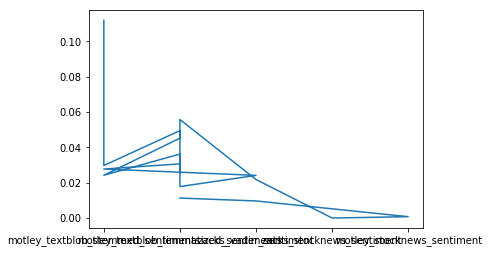

In [52]:
# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(f_l, c_l)#range(len(X.columns)), c_l)
# plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
# plt.margins(0.02)
plt.show()

## Model 2 with Sentiments by News Source

In [67]:
#Run Model 2 with Sentiments by News Source
f, c_m, s, c_l, f_l = sent_monte_carlo_2(sent_news_df, 20, 'liblinear')

Monte Carlo Sentiment Analysis Results:
Number of iterations:        20
Number of selected features: 7
Best feature:                zacks_stocknews_sentiment
Best coefficient:            0.5765271526213837
Days Shifted:                1


In [68]:
winner=news_df[f].shift(s)

In [69]:
news_df[f+'_shifted_'+str(s)+'_days']=pd.DataFrame(winner)
news_df.head()

,dly_rtn,zacks_stocknews_sentiment,zacks_vader_sentiment,zacks_textblob_lemmatized_sentiments,zacks_textblob_stemmed_sentiments,motley_stocknews_sentiment,motley_vader_sentiment,motley_textblob_lemmatized_sentiments,motley_textblob_stemmed_sentiments,motley_textblob_stemmed_sentiments_shifted_0_days,zacks_stocknews_sentiment_shifted_1_days
date,,,,,,,,,,,
4/2/19,-0.011412,-1.000000,0.996800,-0.069765,-0.154898,0.000000,-0.403700,0.077399,0.064030,0.064030,NaN
4/3/19,0.020743,-0.666667,0.370467,-0.022086,-0.056175,-0.166667,-0.142800,0.076253,0.090785,0.090785,-1.000000
4/4/19,-0.082348,-0.333333,-0.255867,0.025594,0.042549,-0.333333,0.118100,0.075108,0.117540,0.117540,-0.666667
4/5/19,0.026813,-0.166667,0.177117,0.035486,0.041806,-0.666667,0.295625,0.057064,0.086493,0.086493,-0.333333
4/8/19,-0.006401,-0.166667,0.177117,0.035486,0.041806,-0.666667,0.295625,0.057064,0.086493,0.086493,-0.166667


In [70]:
# Plot the daily returns and best feature
news_df.hvplot.line(
    x="date",
    xlabel="Closing Date",
    y=["dly_rtn", f+'_shifted_'+str(s)+'_days'],
    rot=90,
    width=800,
    height=600).opts(
        title="Model 2: Winner of Sentiments by News Source",
        legend_position='bottom')

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [ ]:
#Run Model 2 with Sentiments by News Source
f, c_m, s, c_l, f_l = sent_monte_carlo_2(sent_news_df, 20, 'saga')